<a href="https://colab.research.google.com/github/Haseeb-zai30/Ai-notebooks/blob/main/day_4_Introduction_to_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Seaborn:
Seaborn: a statistical visualization library built on top of Matplotlib. Simplifies complex plots.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Setup & Introduction
Themes / Styles: 'whitegrid', 'darkgrid', 'dark', 'ticks', etc. Affect background, grid look.

Context: 'paper', 'notebook', 'talk', 'poster' — changes font size, line width etc to suit presentation environments.

Default plotting sizes & settings help uniform look across notebook.

In [2]:
# Seaborn & Matplotlib configuration
sns.set_theme(style="whitegrid", context="notebook", palette="deep")
plt.rcParams["figure.figsize"] = (10, 6)   # Default figure size


In [3]:
# For reproducibility when generating synthetic data
np.random.seed(42)


In [5]:
print("Setup complete: seaborn version", sns.__version__)

Setup complete: seaborn version 0.13.2


## Sample Data Preparation
Built-in datasets are useful for quick learning because they are clean and well documented.

Synthetic data is helpful when you want to explore particular patterns you want (e.g. scatter + trend, time series, etc.).

Always inspect: .head(), .dtypes, .describe() — to understand what you have.

In [9]:
#use an in-built dataset from seaborn
df_tips = sns.load_dataset("tips")
# This dataset has info about tips from a restaurant: total bill, tip, sex, smoker, day, time, size.


In [10]:
# Display first few rows & summary
print("Tips dataset example:\n", df_tips.head())

Tips dataset example:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [12]:
#synthetic data for custom examples
df_synth = pd.DataFrame({
    "Category": np.random.choice(["A", "B", "C"], size=200),
    "Value1": np.random.normal(loc=10, scale=2, size=200),
    "Value2": np.random.normal(loc=20, scale=5, size=200),
    "Binary": np.random.choice([0, 1], size=200),
    "Date": pd.date_range(start="2022-01-01", periods=200, freq="D")
})


In [13]:
# Display first few rows & summary
print("\nSynthetic dataset example:\n", df_synth.head())

print("\nData types:\n", df_synth.dtypes)


Synthetic dataset example:
   Category     Value1     Value2  Binary       Date
0        C   8.674523  28.054102       1 2022-01-01
1        A   9.707054  22.639802       1 2022-01-02
2        C   8.307966  18.161186       0 2022-01-03
3        C   8.355021  17.261383       0 2022-01-04
4        A  12.173454  25.218378       0 2022-01-05

Data types:
 Category            object
Value1             float64
Value2             float64
Binary               int64
Date        datetime64[ns]
dtype: object


### Exploratory Data Analysis (EDA):
.describe() gives summary stats: mean, std, quartiles, etc.

Missing data: important to detect early for cleaning or imputation.

Correlations show pairwise linear relationships among numeric variables.

In [15]:
# View summary statistics
print(df_tips.describe(include="all"))

        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000


In [16]:
# Check for missing values
print("\nMissing values (tips dataset):\n", df_tips.isnull().sum())



Missing values (tips dataset):
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [47]:
# Compute correlation matrix of numeric columns in the dataset
# - df_tips.corr() → calculates pairwise correlation coefficients
# - numeric_only=True → ensures only numeric columns are included
#                       (avoids errors from categorical data like 'day' or 'sex')
corr = df_tips.corr(numeric_only=True)

# Print the correlation matrix
print("\nCorrelation matrix:\n", corr)


Correlation matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


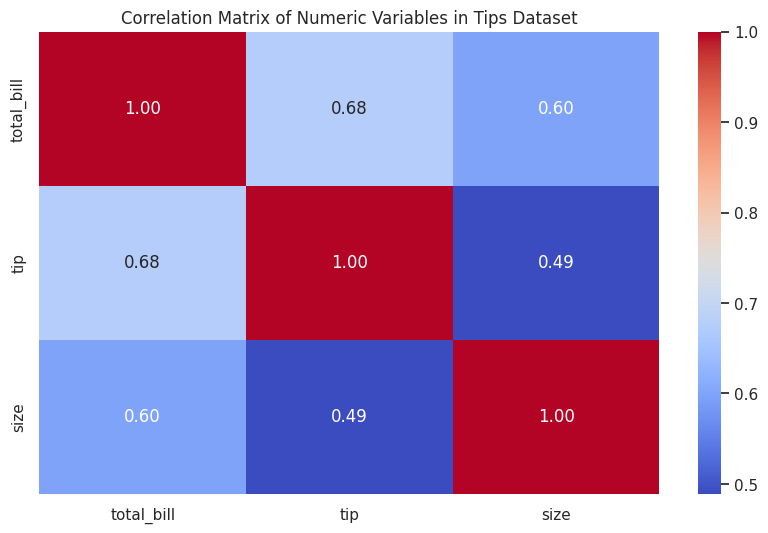

In [46]:
# Heatmap → shows pairwise correlation values between numeric variables
# - corr: correlation matrix (computed with df.corr())
# - annot=True  → display correlation values inside the cells
# - fmt=".2f"   → format numbers to 2 decimal places
# - cmap="coolwarm" → color scale: blue (negative), red (positive)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

# Add title for clarity
plt.title("Correlation Matrix of Numeric Variables in Tips Dataset")

# Display the heatmap
plt.show()

### Distribution Plots


**Histogram + KDE of a numeric variable**

**Histogram:** Divides continuous data (here: total_bill) into bins and counts how many observations fall in each bin. It shows distribution shape (skewness, spread).

**KDE (Kernel Density Estimate):** A smooth curve estimating the probability density function of the data. It’s like a smoothed version of the histogram.

**What it does here:**

Plots histogram of total_bill (x-axis = bill amount, y-axis = frequency).

Adds a KDE curve to show the smooth distribution.

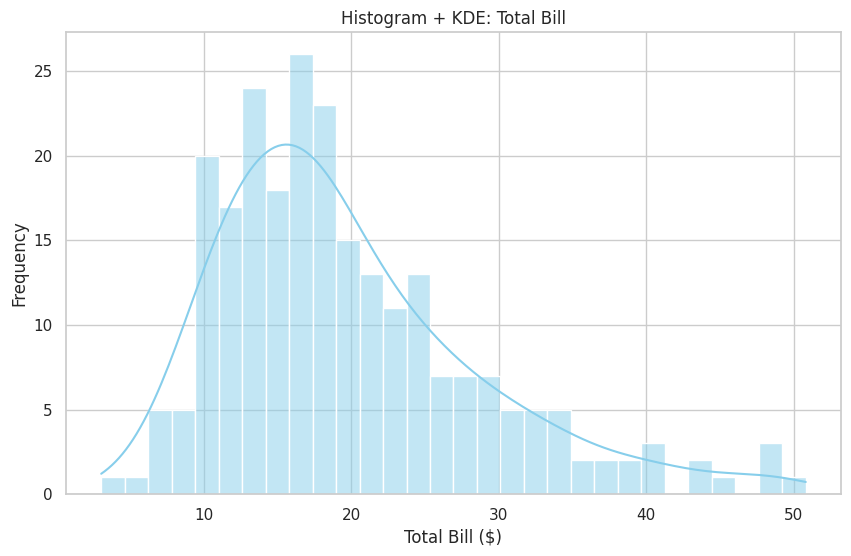

In [45]:
# Histogram + KDE → shows distribution of a continuous variable
# - data=df_tips          → use the tips dataset
# - x="total_bill"        → plot total bill amounts
# - kde=True              → overlay a Kernel Density Estimate (smooth curve)
# - bins=30               → divide the data into 30 intervals (bars)
# - color="skyblue"       → set bar color
sns.histplot(
    data=df_tips,
    x="total_bill",
    kde=True,
    bins=30,
    color="skyblue"
)

# Add title and axis labels
plt.title("Histogram + KDE: Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### Rugplot + KDE
**KDE (again):** Smooth curve showing distribution of tips.

**Rugplot:** Draws small ticks on the x-axis for each data point. It shows where actual observations lie.

**What it does here:**

KDE curve shows the distribution of tips (most tips are between ~2–4 dollars).

Rug marks each actual data point, so you can see both density and raw observations.

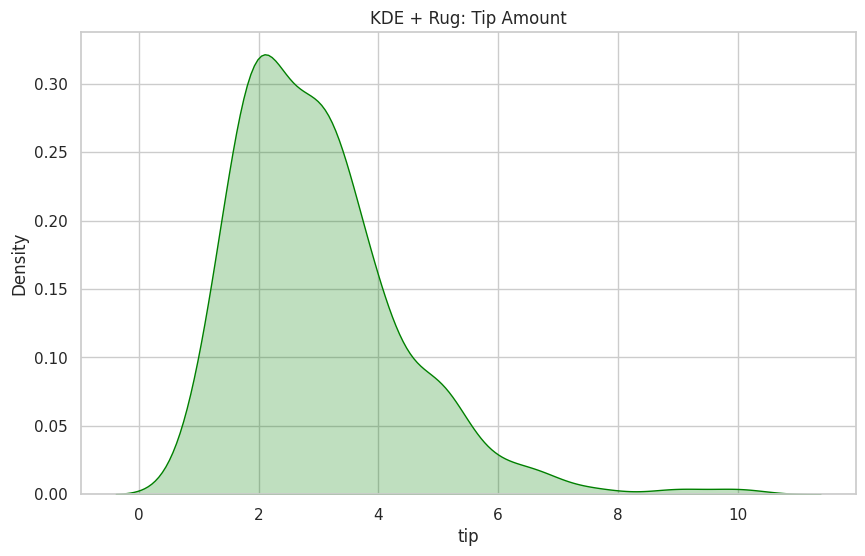

In [44]:
# =============================================
# Rugplot + KDE
# =============================================

# KDE plot → smooth probability density curve
# - data=df_tips      → use tips dataset
# - x="tip"           → show distribution of tip amounts
# - fill=True         → fill the area under the KDE curve (instead of only the line)
# - color="green"     → set curve color to green
sns.kdeplot(
    data=df_tips,
    x="tip",
    fill=True,
    color="green"
)

# Add plot title
plt.title("KDE + Rug: Tip Amount")

# Display the plot
plt.show()


### Joint plot: total_bill vs tip

**Jointplot:** Combines a scatterplot with histograms/KDEs on the margins.

Scatterplot shows the relationship between two variables (correlation, clusters, outliers).

Marginal plots show the distribution of each variable separately.

**What it does here:**

Scatterplot of total_bill (x) vs tip (y) → shows that larger bills usually have higher tips.

Marginal histograms show how each variable is distributed individually.

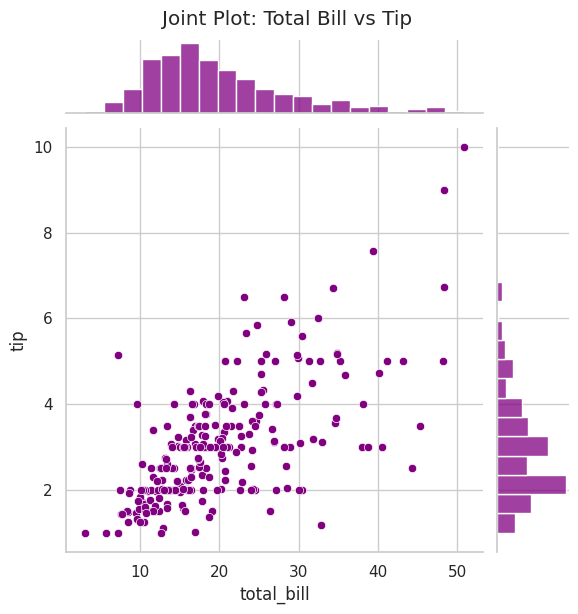

In [43]:
# Jointplot → combines scatterplot (2D) with histograms (1D marginals)
# - data=df_tips          → tips dataset
# - x="total_bill"        → total bill on x-axis
# - y="tip"               → tip amount on y-axis
# - kind="scatter"        → scatter plot in the center
# - color="purple"        → scatter points in purple
# - marginal_kws={"bins": 20} → use 20 bins for histograms on margins
sns.jointplot(
    data=df_tips,
    x="total_bill",
    y="tip",
    kind="scatter",
    color="purple",
    marginal_kws={"bins": 20}
)

# Add a title above the whole figure
plt.suptitle("Joint Plot: Total Bill vs Tip", y=1.02)

# Show the plot
plt.show()

### Pair plot (pairwise relationships)
**Pairplot:** Creates scatterplots for all pairs of chosen variables + KDE/histograms on diagonals.

Great for exploring multivariate relationships.

hue="smoker" colors points by smoker/non-smoker, showing group differences.

corner=True avoids duplicate upper triangle plots.

diag_kind="kde" adds smooth density curves on the diagonal instead of histograms.

What it does here:

Compares total_bill, tip, and size pairwise:

total_bill vs tip: positive trend (bigger bills → bigger tips).

size vs total_bill: larger party size tends to spend more.

Diagonal plots: show KDE of each variable.

The smoker hue lets you compare if smokers tip differently than non-smokers.

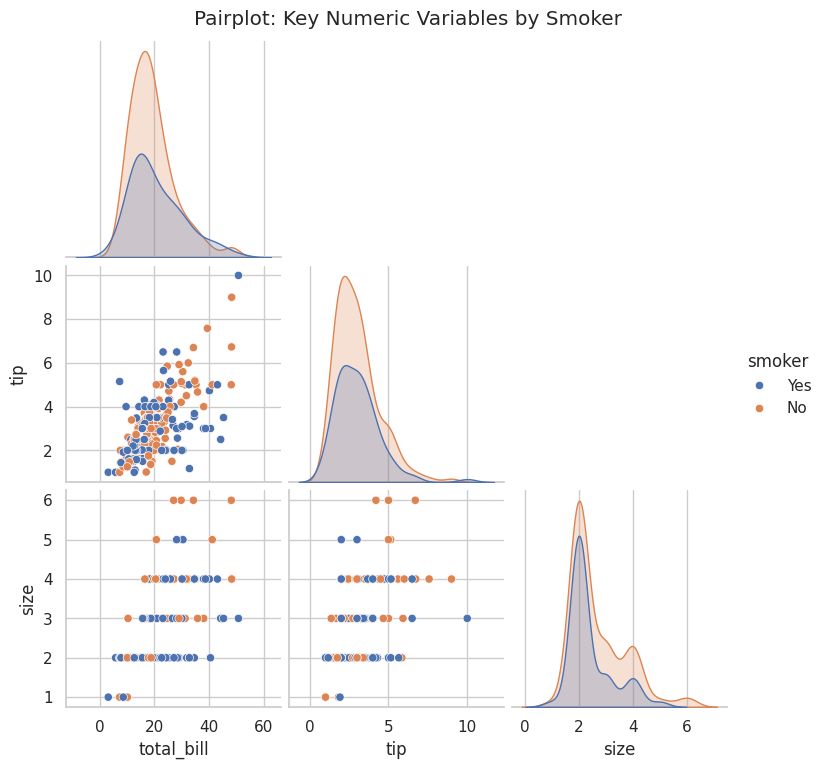

In [41]:
# Pairplot → plots pairwise scatterplots & distributions
# - data=df_tips             → tips dataset
# - hue="smoker"             → color points by smoker status
# - vars=["total_bill","tip","size"] → only include these numeric columns
# - corner=True              → show only lower triangle (avoid duplicates)
# - diag_kind="kde"          → use Kernel Density Estimate instead of histograms
sns.pairplot(
    df_tips,
    hue="smoker",
    vars=["total_bill", "tip", "size"],
    corner=True,
    diag_kind="kde"
)

# Add a title above the grid
plt.suptitle("Pairplot: Key Numeric Variables by Smoker", y=1.02)

# Show the complete plot
plt.show()

### Categorical Plots:
## 1. Box plot
Shows distribution using quartiles:

Box = interquartile range (Q1–Q3).

Line inside = median.

Whiskers = spread (up to 1.5× IQR).

Dots outside = outliers.

Great for comparing distributions across categories.

**Here:**

Compares total_bill across days.

Splits by smoker vs non-smoker.

Example: We can see if smokers tend to spend more/less on certain days.

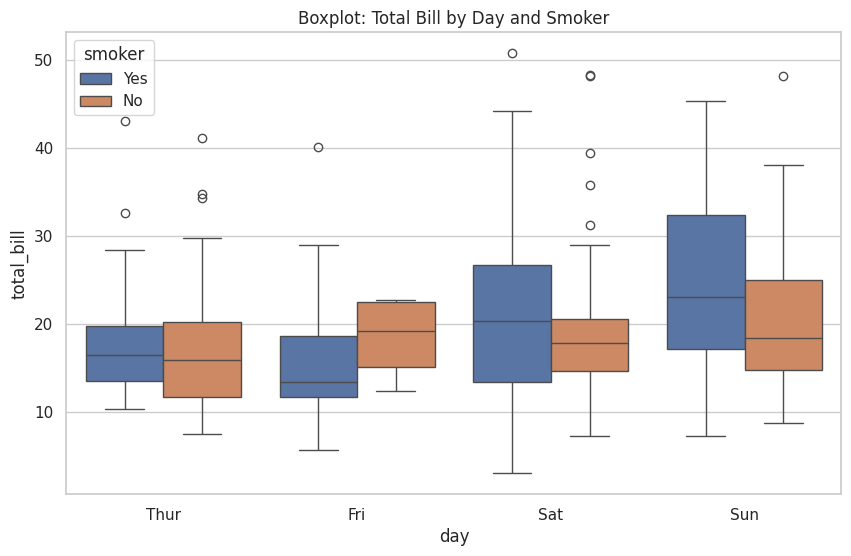

In [40]:
# Boxplot → shows distribution using quartiles & outliers
# - data=df_tips  → tips dataset
# - x="day"       → categorical variable (Thur, Fri, Sat, Sun)
# - y="total_bill"→ numeric variable to analyze
# - hue="smoker"  → split each day into smoker vs non-smoker groups
sns.boxplot(
    data=df_tips,
    x="day",
    y="total_bill",
    hue="smoker"
)

# Add a descriptive title
plt.title("Boxplot: Total Bill by Day and Smoker")

# Show the plot
plt.show()

### 2. Violin plot:
Combines boxplot with KDE distribution mirrored on both sides → violin-like shape.

inner="quartile" adds quartile lines inside.

split=True puts smokers & non-smokers inside the same violin for comparison.

**Here:**

Compares distribution of tip between Lunch vs Dinner.

Inside each meal time, shows smoker vs non-smoker patterns.

Wider violin = more observations in that tip range.

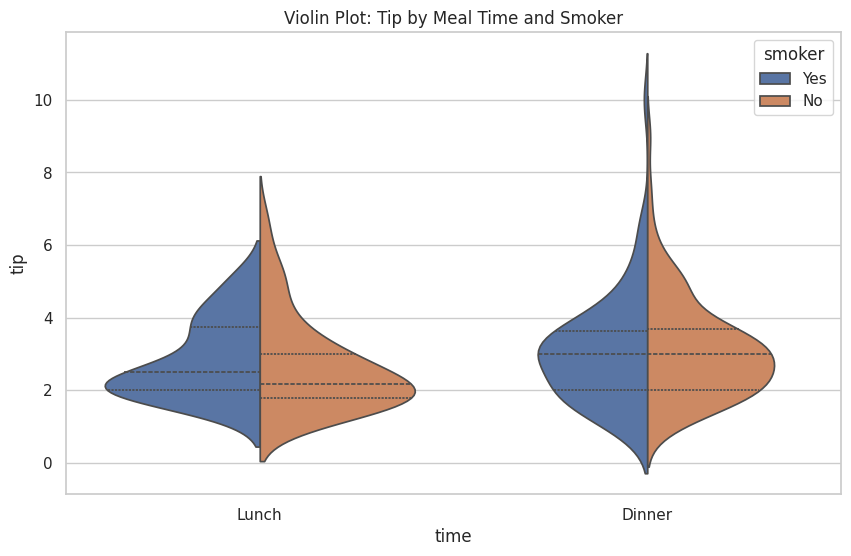

In [39]:
# =============================================
# Violin Plot: Distribution of Tips
# =============================================

# Violin plot → combines a boxplot + KDE (density curve)
# - data=df_tips → tips dataset
# - x="time"     → categorical variable (Lunch / Dinner)
# - y="tip"      → numeric variable (tip amount)
# - hue="smoker" → compare smoker vs non-smoker groups
# - split=True   → put both distributions into the same half of the violin for easier comparison
# - inner="quartile" → show median + quartiles inside the violin
sns.violinplot(
    data=df_tips,
    x="time",
    y="tip",
    inner="quartile",
    hue="smoker",
    split=True
)

# Add a descriptive title
plt.title("Violin Plot: Tip by Meal Time and Smoker")

# Display the plot
plt.show()


### 3. Count plot:
A bar plot showing frequency counts of categorical values.

Like a histogram for categorical data.

**Here:**

Counts how many entries are for each day.

Breaks down counts by sex (male/female).

Example: Shows if more males or females visited on certain days.

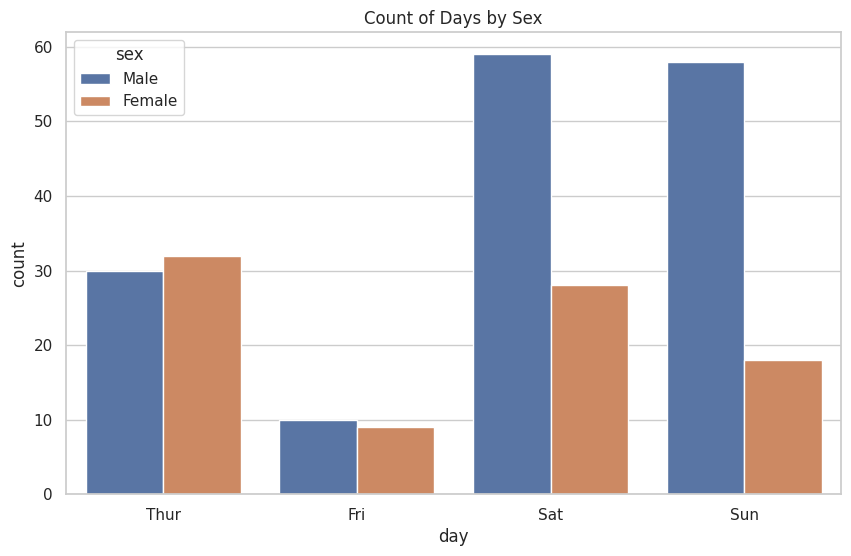

In [38]:
# Count plot → shows the number of observations in each category
# - data=df_tips → use the tips dataset
# - x="day"      → categorical variable on x-axis (Thur, Fri, Sat, Sun)
# - hue="sex"    → split each bar into Male vs Female groups
sns.countplot(data=df_tips, x="day", hue="sex")

# Add a title for clarity
plt.title("Count of Days by Sex")

# Display the plot
plt.show()

### 4. Bar plot (mean values):
Bar height = mean value of y for each category.

Error bars = confidence interval or standard deviation (ci="sd").

Good for comparing averages.

**Here:**

Average total_bill by day.

Split by sex.

Error bars show variability (how spread out the bills are).

/tmp/ipython-input-4219612406.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_tips, x="day", y="total_bill", hue="sex", ci="sd")


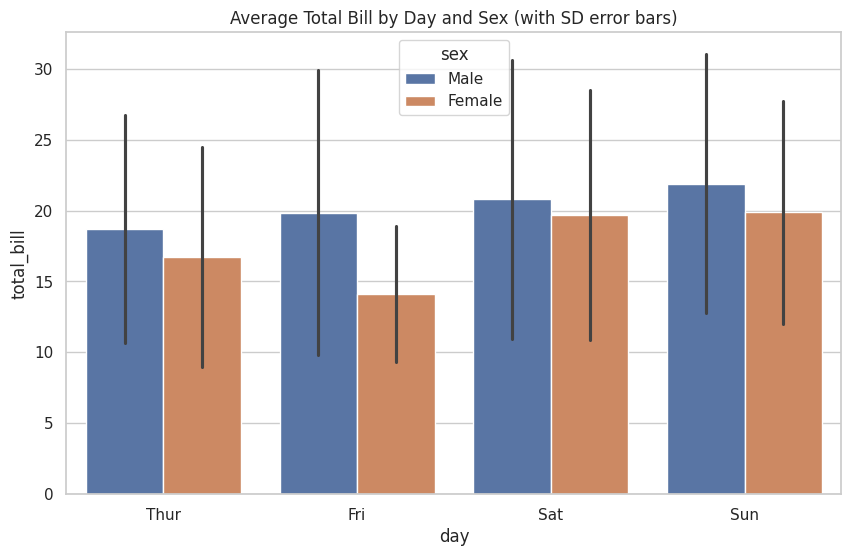

In [37]:
# Bar plot → shows the average value of a numeric variable for each category
# - data=df_tips → use the tips dataset
# - x="day"      → categorical variable on x-axis (Thur, Fri, Sat, Sun)
# - y="total_bill" → numeric variable on y-axis (total bill amount)
# - hue="sex"    → split each day into sub-bars for Male vs Female customers
# - ci="sd"      → show error bars using standard deviation (variability measure)
sns.barplot(data=df_tips, x="day", y="total_bill", hue="sex", ci="sd")

# Add a title for clarity
plt.title("Average Total Bill by Day and Sex (with SD error bars)")

# Display the plot
plt.show()

### 5. Strip plot + Swarm plo

Strip plot: Plots individual points for each observation → shows raw data.

jitter=True adds small random noise to avoid overlap.

Swarm plot: Similar to strip, but uses an algorithm to prevent overlap (better visualization of point density).

Overlaying them gives raw points (strip) + nicely spread alignment (swarm).

**Here:**

Shows all tip amounts across days, separated by sex.

Lets you see both individual tips and overall clustering.

Example: You’ll see if one gender tips more on certain days.

/tmp/ipython-input-2894775034.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.swarmplot(data=df_tips, x="day", y="tip", hue="sex", dodge=True, color="k", size=3)


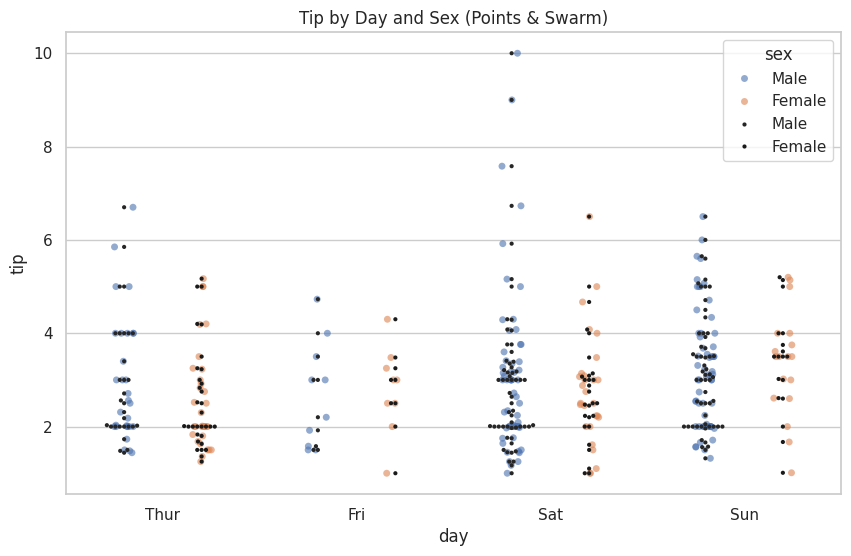

In [36]:
# Strip plot → plots all individual data points for categorical x vs numeric y
# - data=df_tips → use the tips dataset
# - x="day"      → categorical variable on the x-axis (Thur, Fri, Sat, Sun)
# - y="tip"      → numeric variable on the y-axis (tip amount)
# - jitter=True  → add random noise on x-axis so overlapping points spread out
# - hue="sex"    → color points by 'sex' (Male/Female)
# - dodge=True   → separate hues within the same day (side-by-side instead of overlapping)
# - alpha=0.6    → transparency for better visibility
sns.stripplot(data=df_tips, x="day", y="tip", jitter=True, hue="sex", dodge=True, alpha=0.6)

# Swarm plot → similar to strip plot, but points are adjusted to avoid overlap
# - color="k"   → use black for swarm points
# - size=3      → make swarm points smaller
# - hue/dodge   → same grouping logic as stripplot
sns.swarmplot(data=df_tips, x="day", y="tip", hue="sex", dodge=True, color="k", size=3)

# Add a title
plt.title("Tip by Day and Sex (Points & Swarm)")

# Show the combined plot
plt.show()


### Matrix / Heatmap Plots


### 1. Correlation Heatmap
**Correlation matrix:** Measures the strength of linear relationships between numeric variables.

Values range from -1 (perfect negative) → 0 (no correlation) → +1 (perfect positive).

Heatmap: Color-coded grid where each cell represents the correlation between two variables.

**Here:**

corr is the correlation matrix of numeric columns in df_tips (like total_bill, tip, size).

annot=True shows numbers inside each cell.

fmt=".2f" → rounds to 2 decimal places.

cmap="YlGnBu" → yellow-green-blue color scheme.

Helps spot patterns, e.g.:

total_bill and tip are strongly positively correlated.

size also correlates with total_bill (larger groups spend more)

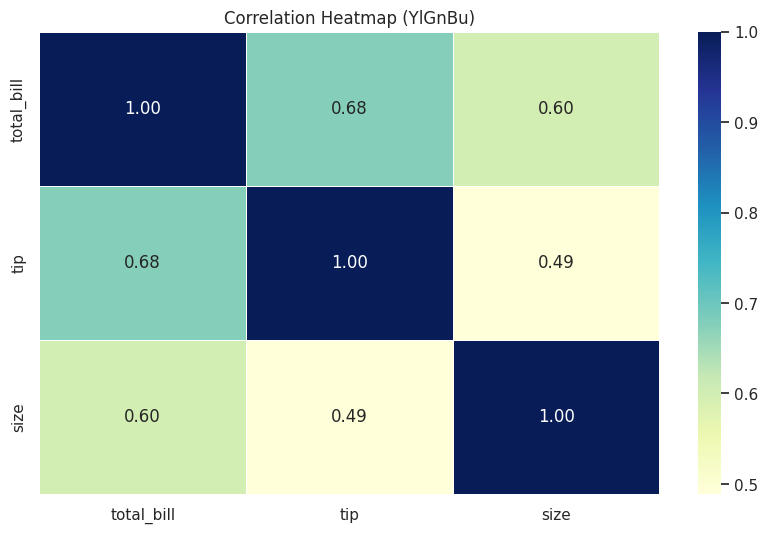

In [35]:
# Draw a heatmap of the correlation matrix
# - corr           → the correlation matrix (numeric-only columns from df_tips)
# - annot=True     → write the correlation values inside each cell
# - fmt=".2f"      → format numbers to 2 decimal places (e.g., 0.67 instead of 0.6666...)
# - cmap="YlGnBu"  → use the Yellow-Green-Blue color palette for better readability
# - linewidths=0.5 → add thin lines between cells for a cleaner grid look
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

# Add a title to the heatmap
plt.title("Correlation Heatmap (YlGnBu)")

# Show the plot
plt.show()

### 2. Pivot Table + Heatmap:
**Pivot Table**: Summarizes data by grouping rows/columns and applying an aggregation (mean, sum, etc.).

In this case:
**bold text**
Rows (index) = days (Thur, Fri, Sat, Sun).

Columns (columns) = time of day (Lunch, Dinner).

Values = mean total_bill.

Heatmap: Turns the pivot table into a color-coded matrix → easy to compare values.

**Here:**

Shows average total_bill for each day × time combination.

annot=True writes numbers inside cells.

cmap="viridis" gives a dark-to-light gradient.

Example insights:

Dinner bills tend to be higher than lunch bills.

Saturdays and Sundays have higher spending compared to Thursdays/Fridays.

Pivot Table – average total bill by day & time:
 time      Lunch     Dinner
day                       
Thur  17.664754  18.780000
Fri   12.845714  19.663333
Sat         NaN  20.441379
Sun         NaN  21.410000


/tmp/ipython-input-1196274129.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_tips.pivot_table(


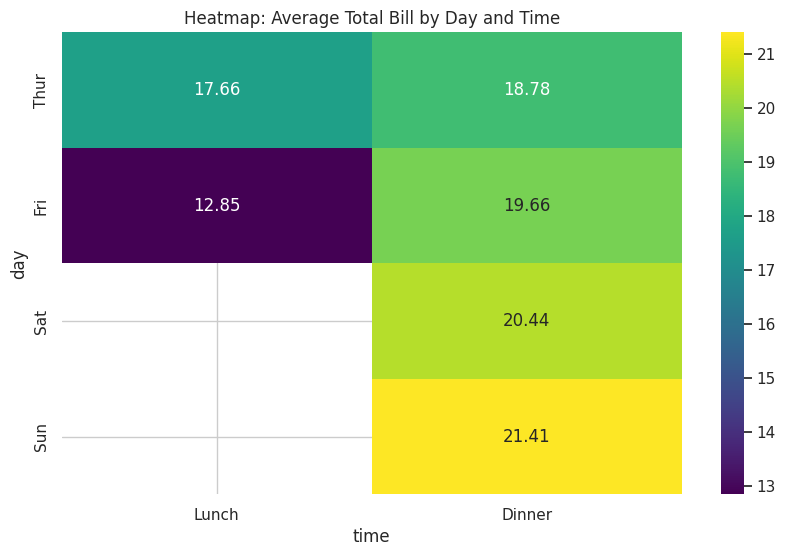

In [34]:
# Create a pivot table from df_tips
# - index="day"    → rows will be days of the week (Thur, Fri, Sat, Sun)
# - columns="time" → columns will be meal times (Lunch, Dinner)
# - values="total_bill" → the numeric values we want to summarize
# - aggfunc="mean" → take the average of total_bill for each (day, time) group
pivot = df_tips.pivot_table(
    index="day",
    columns="time",
    values="total_bill",
    aggfunc="mean"
)

# Print the pivot table (raw numbers before visualization)
print("Pivot Table – average total bill by day & time:\n", pivot)

# Visualize the pivot table as a heatmap
# - annot=True → show the actual numeric values inside each cell
# - fmt=".2f"  → format numbers to 2 decimal places
# - cmap="viridis" → color map (dark purple → green → yellow gradient)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")

# Add a title to the plot
plt.title("Heatmap: Average Total Bill by Day and Time")

# Display the heatmap
plt.show()